In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load the dataset
data = open('/content/drive/MyDrive/MinorProject/subject01_walk1_ik.mot')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
data = data.readlines()

In [ ]:
data

In [ ]:
headers = data[10].split('\t')

In [ ]:
headers

['time',
 'pelvis_tilt',
 'pelvis_list',
 'pelvis_rotation',
 'pelvis_tx',
 'pelvis_ty',
 'pelvis_tz',
 'hip_flexion_r',
 'hip_adduction_r',
 'hip_rotation_r',
 'knee_angle_r',
 'ankle_angle_r',
 'subtalar_angle_r',
 'mtp_angle_r',
 'hip_flexion_l',
 'hip_adduction_l',
 'hip_rotation_l',
 'knee_angle_l',
 'ankle_angle_l',
 'subtalar_angle_l',
 'mtp_angle_l',
 'lumbar_extension',
 'lumbar_bending',
 'lumbar_rotation\n']

In [ ]:
hip_l = []
hip_r = []
knee_l = []
knee_r = []
ankle_l = []
ankle_r = []
time = []

for i in range(11,len(data)):
  tmp = data[i].split('\t')
  time.append(tmp[0])
  hip_r.append(tmp[7])
  knee_r.append(tmp[10])
  ankle_r.append(tmp[11])
  hip_l.append(tmp[14])
  knee_l.append(tmp[17])
  ankle_l.append(tmp[18])

In [ ]:
hip_r

['     20.01810174',
 '     20.47637723',
 '     20.79106998',
 '     20.59068147',
 '     20.54892710',
 '     19.88677694',
 '     19.29340437',
 '     18.74544079',
 '     18.19344446',
 '     17.72372645',
 '     17.63128857',
 '     17.74833716',
 '     17.97079785',
 '     18.60892857',
 '     19.29527419',
 '     20.08813956',
 '     20.78989355',
 '     21.44000176',
 '     21.52044497',
 '     21.12066465',
 '     20.84985462',
 '     20.13267105',
 '     19.44668490',
 '     18.50691499',
 '     17.41384468',
 '     15.85375835',
 '     14.28025803',
 '     12.48261686',
 '     10.65247567',
 '      8.83184480',
 '      6.83266332',
 '      5.01331390',
 '      3.08625197',
 '      1.89281683',
 '      0.56775533',
 '     -1.41037472',
 '     -2.82540871',
 '     -4.27623510',
 '     -5.79700882',
 '     -7.39397466',
 '     -8.65078118',
 '    -10.03790436',
 '    -11.47191303',
 '    -12.79549323',
 '    -14.03426232',
 '    -15.62397211',
 '    -17.13341139',
 '    -18.521

In [ ]:
hip_l = np.array(hip_l,dtype = float)
hip_r = np.array(hip_r,dtype = float)
knee_l = np.array(knee_l,dtype=float)
knee_r = np.array(knee_r,dtype = float)
ankle_l = np.array(ankle_l,dtype = float)
ankle_r = np.array(ankle_r,dtype = float)
time = np.array(time,dtype = float)

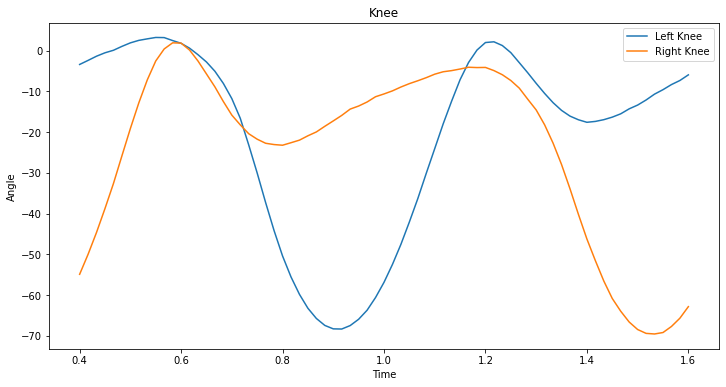

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(time,knee_l)
plt.plot(time,knee_r)
plt.title('Knee')
plt.xlabel('Time')
plt.ylabel('Angle')
plt.legend(['Left Knee','Right Knee'])
plt.show()

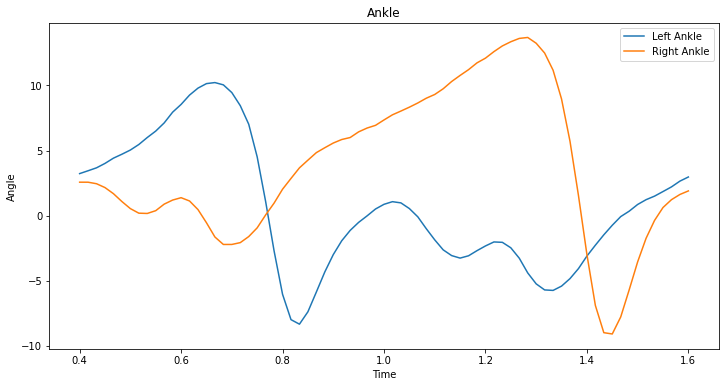

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(time,ankle_l)
plt.plot(time,ankle_r)
plt.title('Ankle')
plt.xlabel('Time')
plt.ylabel('Angle')
plt.legend(['Left Ankle','Right Ankle'])
plt.show()

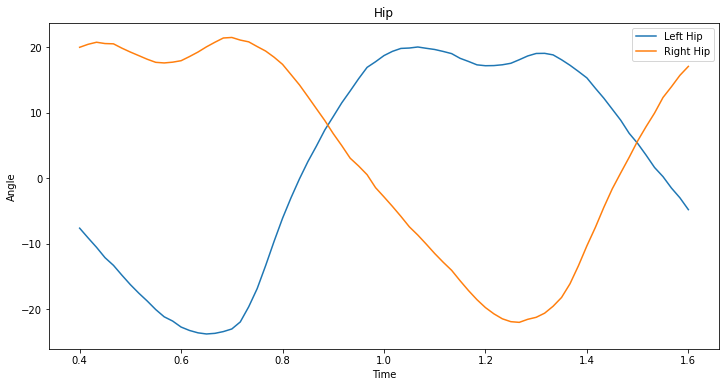

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(time,hip_l)
plt.plot(time,hip_r)
plt.title('Hip')
plt.xlabel('Time')
plt.ylabel('Angle')
plt.legend(['Left Hip','Right Hip'])
plt.show()

In [ ]:
d = {'time':time,'knee_r':knee_r}
dataframe = pd.DataFrame(data = d)

In [ ]:
dataframe

,time,knee_r
0,0.400000,-54.919823
1,0.416667,-50.007087
2,0.433333,-44.626732
3,0.450000,-38.769752
4,0.466667,-32.634932
...,...,...
68,1.533333,-69.566914
69,1.550000,-69.211678
70,1.566667,-67.725239
71,1.583333,-65.687458


In [ ]:
dataset = dataframe['knee_r'].values

In [ ]:
dataset = dataset.reshape((-1,1))

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

48 25


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
print(trainX.shape,trainY.shape)
print(trainX)

(46, 1) (46,)
[[0.20495993]
 [0.27370491]
 [0.34899338]
 [0.43095138]
 [0.51679726]
 [0.61165266]
 [0.70552611]
 [0.7938109 ]
 [0.87255214]
 [0.93752941]
 [0.97889795]
 [1.        ]
 [0.99890514]
 [0.97517108]
 [0.93749401]
 [0.8931384 ]
 [0.84866183]
 [0.79826727]
 [0.75173019]
 [0.7182318 ]
 [0.68774043]
 [0.66899044]
 [0.65499818]
 [0.65054674]
 [0.64827209]
 [0.6568636 ]
 [0.66572371]
 [0.68071031]
 [0.69391721]
 [0.71325861]
 [0.7317574 ]
 [0.7506704 ]
 [0.77237027]
 [0.78289398]
 [0.79671004]
 [0.81483913]
 [0.82438635]
 [0.8349516 ]
 [0.8481799 ]
 [0.85981035]
 [0.86970318]
 [0.8803311 ]
 [0.89225867]
 [0.90056935]
 [0.90451405]
 [0.91001217]]


In [ ]:
print(trainY)

[0.27370491 0.34899338 0.43095138 0.51679726 0.61165266 0.70552611
 0.7938109  0.87255214 0.93752941 0.97889795 1.         0.99890514
 0.97517108 0.93749401 0.8931384  0.84866183 0.79826727 0.75173019
 0.7182318  0.68774043 0.66899044 0.65499818 0.65054674 0.64827209
 0.6568636  0.66572371 0.68071031 0.69391721 0.71325861 0.7317574
 0.7506704  0.77237027 0.78289398 0.79671004 0.81483913 0.82438635
 0.8349516  0.8481799  0.85981035 0.86970318 0.8803311  0.89225867
 0.90056935 0.90451405 0.91001217 0.91608136]


In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
print(trainX.shape)

(46, 1, 1)


In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(50, activation = 'relu',input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['accuracy'])
history = model.fit(trainX, trainY,validation_data=(testX,testY), epochs=100, batch_size=1, verbose=2)

Epoch 1/100
46/46 - 1s - loss: 0.4978 - accuracy: 0.0000e+00 - val_loss: 0.1620 - val_accuracy: 0.0435
Epoch 2/100
46/46 - 0s - loss: 0.2859 - accuracy: 0.0000e+00 - val_loss: 0.0821 - val_accuracy: 0.0435
Epoch 3/100
46/46 - 0s - loss: 0.1100 - accuracy: 0.0217 - val_loss: 0.0489 - val_accuracy: 0.0435
Epoch 4/100
46/46 - 0s - loss: 0.0216 - accuracy: 0.0217 - val_loss: 0.0632 - val_accuracy: 0.0435
Epoch 5/100
46/46 - 0s - loss: 0.0048 - accuracy: 0.0217 - val_loss: 0.0712 - val_accuracy: 0.0435
Epoch 6/100
46/46 - 0s - loss: 0.0044 - accuracy: 0.0217 - val_loss: 0.0715 - val_accuracy: 0.0435
Epoch 7/100
46/46 - 0s - loss: 0.0043 - accuracy: 0.0217 - val_loss: 0.0705 - val_accuracy: 0.0435
Epoch 8/100
46/46 - 0s - loss: 0.0041 - accuracy: 0.0217 - val_loss: 0.0693 - val_accuracy: 0.0435
Epoch 9/100
46/46 - 0s - loss: 0.0041 - accuracy: 0.0217 - val_loss: 0.0690 - val_accuracy: 0.0435
Epoch 10/100
46/46 - 0s - loss: 0.0040 - accuracy: 0.0217 - val_loss: 0.0666 - val_accuracy: 0.0435
E

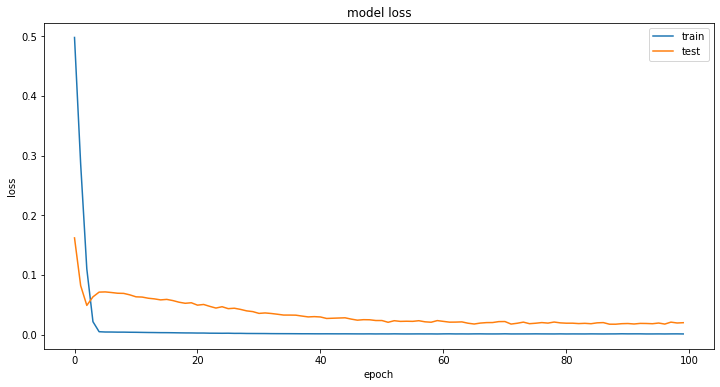

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.38 RMSE
Test Score: 10.09 RMSE


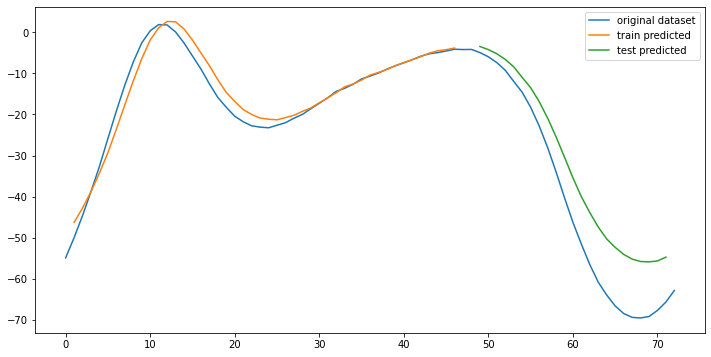

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize = (12,6))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['original dataset','train predicted','test predicted'])
plt.show()

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
# define the true objective function
def objective(x, a, b, c, d,e,f):
	return a * (x**5) + b*(x**4) + c*(x**3) + d*(x**2) + e*x + f

In [ ]:
popt, _ = curve_fit(objective,time, knee_r)
print(popt)
a,b,c,d,e,f = popt

[  3119.31051486 -15923.92917669  31143.00746571 -29112.78271167
  12985.58956761  -2221.9742216 ]


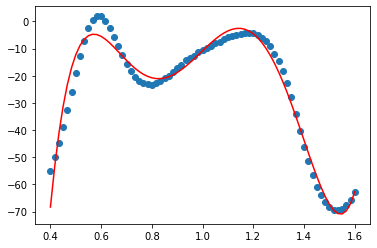

In [ ]:
y_line = objective(time,a,b,c,d,e,f)
plt.plot(time,y_line,c='r',)
plt.scatter(time,knee_r);
plt.show()


##Left Knee trajectory 

In [ ]:
data = knee_l.reshape((-1,1))

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

48 25


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
print(trainX.shape,trainY.shape)
print(trainX)

(46, 1) (46,)
[[9.07402962e-01]
 [9.21378262e-01]
 [9.35771261e-01]
 [9.47445009e-01]
 [9.56073571e-01]
 [9.69413857e-01]
 [9.81465736e-01]
 [9.90040215e-01]
 [9.95207193e-01]
 [1.00000000e+00]
 [9.99557126e-01]
 [9.89361778e-01]
 [9.79989207e-01]
 [9.63263260e-01]
 [9.40868356e-01]
 [9.15950609e-01]
 [8.84084722e-01]
 [8.42292492e-01]
 [7.90324937e-01]
 [7.22795731e-01]
 [6.31320872e-01]
 [5.35075734e-01]
 [4.33637871e-01]
 [3.37394883e-01]
 [2.50602549e-01]
 [1.78677191e-01]
 [1.18961242e-01]
 [7.11815600e-02]
 [3.62427580e-02]
 [1.23778959e-02]
 [5.67798648e-04]
 [0.00000000e+00]
 [1.18612879e-02]
 [3.34824739e-02]
 [6.44951262e-02]
 [1.08061208e-01]
 [1.60090835e-01]
 [2.21577398e-01]
 [2.90405907e-01]
 [3.67123970e-01]
 [4.47464259e-01]
 [5.34219361e-01]
 [6.18766296e-01]
 [7.03675987e-01]
 [7.81702767e-01]
 [8.55240958e-01]]


In [ ]:
print(trainY)

[9.21378262e-01 9.35771261e-01 9.47445009e-01 9.56073571e-01
 9.69413857e-01 9.81465736e-01 9.90040215e-01 9.95207193e-01
 1.00000000e+00 9.99557126e-01 9.89361778e-01 9.79989207e-01
 9.63263260e-01 9.40868356e-01 9.15950609e-01 8.84084722e-01
 8.42292492e-01 7.90324937e-01 7.22795731e-01 6.31320872e-01
 5.35075734e-01 4.33637871e-01 3.37394883e-01 2.50602549e-01
 1.78677191e-01 1.18961242e-01 7.11815600e-02 3.62427580e-02
 1.23778959e-02 5.67798648e-04 0.00000000e+00 1.18612879e-02
 3.34824739e-02 6.44951262e-02 1.08061208e-01 1.60090835e-01
 2.21577398e-01 2.90405907e-01 3.67123970e-01 4.47464259e-01
 5.34219361e-01 6.18766296e-01 7.03675987e-01 7.81702767e-01
 8.55240958e-01 9.14115523e-01]


In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
print(trainX.shape,testX.shape)

(46, 1, 1) (23, 1, 1)


In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(50, activation = 'relu',input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY,validation_data=(testX,testY), epochs=100, batch_size=1, verbose=2)

Epoch 1/100
46/46 - 1s - loss: 0.4017 - val_loss: 0.4821
Epoch 2/100
46/46 - 0s - loss: 0.3000 - val_loss: 0.3374
Epoch 3/100
46/46 - 0s - loss: 0.2014 - val_loss: 0.1970
Epoch 4/100
46/46 - 0s - loss: 0.1154 - val_loss: 0.0941
Epoch 5/100
46/46 - 0s - loss: 0.0641 - val_loss: 0.0307
Epoch 6/100
46/46 - 0s - loss: 0.0431 - val_loss: 0.0103
Epoch 7/100
46/46 - 0s - loss: 0.0371 - val_loss: 0.0054
Epoch 8/100
46/46 - 0s - loss: 0.0327 - val_loss: 0.0039
Epoch 9/100
46/46 - 0s - loss: 0.0294 - val_loss: 0.0022
Epoch 10/100
46/46 - 0s - loss: 0.0261 - val_loss: 0.0023
Epoch 11/100
46/46 - 0s - loss: 0.0232 - val_loss: 0.0025
Epoch 12/100
46/46 - 0s - loss: 0.0202 - val_loss: 0.0013
Epoch 13/100
46/46 - 0s - loss: 0.0179 - val_loss: 0.0014
Epoch 14/100
46/46 - 0s - loss: 0.0154 - val_loss: 0.0011
Epoch 15/100
46/46 - 0s - loss: 0.0133 - val_loss: 9.4625e-04
Epoch 16/100
46/46 - 0s - loss: 0.0116 - val_loss: 9.5657e-04
Epoch 17/100
46/46 - 0s - loss: 0.0099 - val_loss: 8.6562e-04
Epoch 18/10

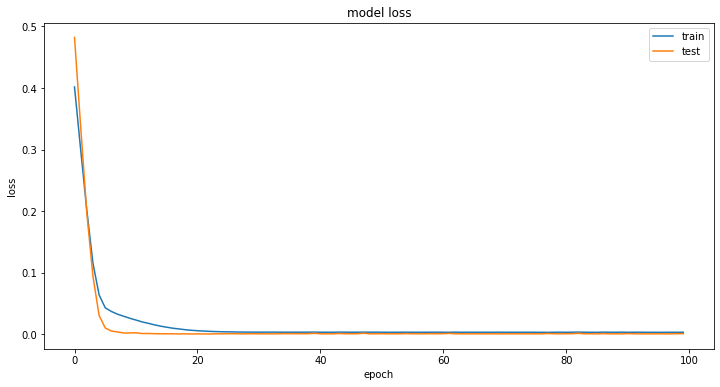

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 4.09 RMSE
Test Score: 2.26 RMSE


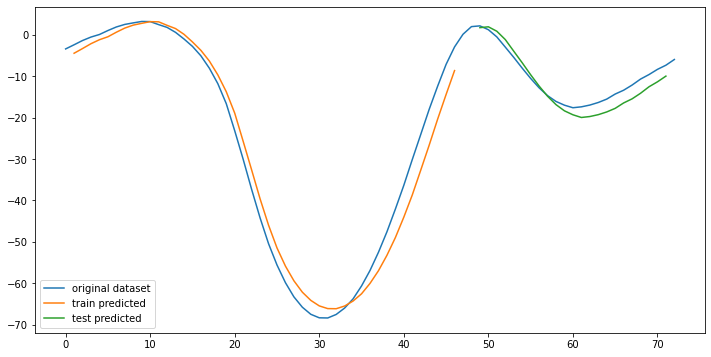

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize = (12,6))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['original dataset','train predicted','test predicted'])
plt.show()

In [ ]:
popt, _ = curve_fit(objective,time, knee_l)
print(popt)
a,b,c,d,e,f = popt

[  3380.66299981 -17789.32110191  35755.01428687 -33926.95564746
  14998.29191813  -2464.45418441]


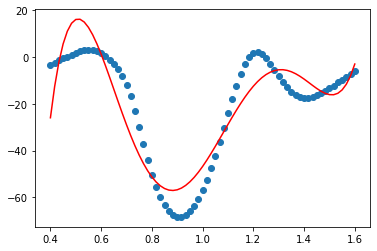

In [ ]:
y_line = objective(time,a,b,c,d,e,f)
plt.plot(time,y_line,c='r',)
plt.scatter(time,knee_l);
plt.show()


##Right Ankle Trajctory Prediction

In [ ]:
data = ankle_r.reshape((-1,1))

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

48 25


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
print(trainX.shape,trainY.shape)
# print(trainX)

(46, 1) (46,)


In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
print(trainX.shape)

(46, 1, 1)


In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(50, activation = 'relu',input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY,validation_data=(testX,testY), epochs=100, batch_size=1, verbose=2)

Epoch 1/100
46/46 - 2s - loss: 0.2751 - val_loss: 0.2771
Epoch 2/100
46/46 - 0s - loss: 0.1587 - val_loss: 0.1572
Epoch 3/100
46/46 - 0s - loss: 0.0667 - val_loss: 0.0781
Epoch 4/100
46/46 - 0s - loss: 0.0213 - val_loss: 0.0476
Epoch 5/100
46/46 - 0s - loss: 0.0110 - val_loss: 0.0421
Epoch 6/100
46/46 - 0s - loss: 0.0098 - val_loss: 0.0404
Epoch 7/100
46/46 - 0s - loss: 0.0095 - val_loss: 0.0388
Epoch 8/100
46/46 - 0s - loss: 0.0089 - val_loss: 0.0370
Epoch 9/100
46/46 - 0s - loss: 0.0084 - val_loss: 0.0354
Epoch 10/100
46/46 - 0s - loss: 0.0081 - val_loss: 0.0338
Epoch 11/100
46/46 - 0s - loss: 0.0077 - val_loss: 0.0320
Epoch 12/100
46/46 - 0s - loss: 0.0072 - val_loss: 0.0304
Epoch 13/100
46/46 - 0s - loss: 0.0067 - val_loss: 0.0288
Epoch 14/100
46/46 - 0s - loss: 0.0065 - val_loss: 0.0272
Epoch 15/100
46/46 - 0s - loss: 0.0060 - val_loss: 0.0257
Epoch 16/100
46/46 - 0s - loss: 0.0058 - val_loss: 0.0244
Epoch 17/100
46/46 - 0s - loss: 0.0053 - val_loss: 0.0229
Epoch 18/100
46/46 - 0s

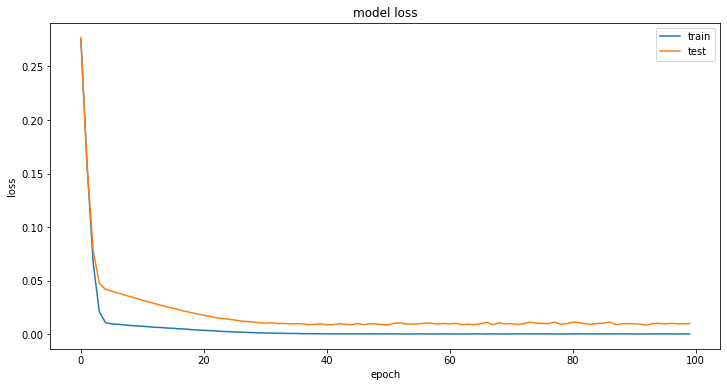

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.48 RMSE
Test Score: 2.28 RMSE


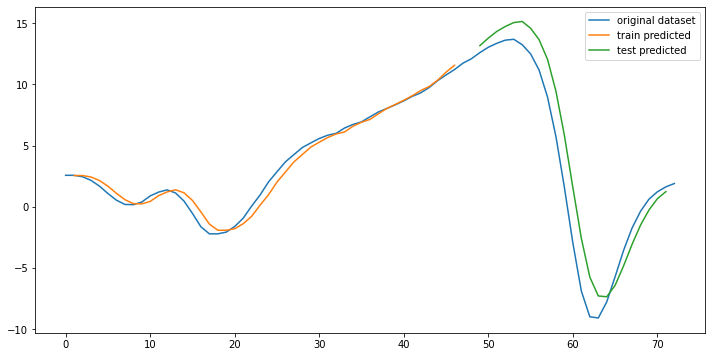

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize = (12,6))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['original dataset','train predicted','test predicted'])
plt.show()

In [ ]:
popt, _ = curve_fit(objective,time, ankle_r)
print(popt)
a,b,c,d,e,f = popt

[  759.16522744 -3628.12625011  6532.35273734 -5500.709935
  2164.69360699  -318.29489381]


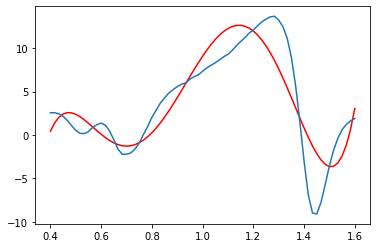

In [ ]:
y_line = objective(time,a,b,c,d,e,f)
plt.plot(time,y_line,c='r',)
plt.plot(time,ankle_r);
plt.show()


##Left Hip Trajectory

In [ ]:
data = hip_l.reshape((-1,1))

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

48 25


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
print(trainX.shape,trainY.shape)
# print(trainX)

(46, 1) (46,)


In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
print(trainX.shape)

(46, 1, 1)


In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(50, activation = 'relu',input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY,validation_data=(testX,testY), epochs=100, batch_size=1, verbose=2)

Epoch 1/100
46/46 - 1s - loss: 0.3664 - val_loss: 0.5834
Epoch 2/100
46/46 - 0s - loss: 0.2923 - val_loss: 0.4530
Epoch 3/100
46/46 - 0s - loss: 0.2256 - val_loss: 0.3227
Epoch 4/100
46/46 - 0s - loss: 0.1634 - val_loss: 0.2070
Epoch 5/100
46/46 - 0s - loss: 0.1131 - val_loss: 0.1227
Epoch 6/100
46/46 - 0s - loss: 0.0801 - val_loss: 0.0658
Epoch 7/100
46/46 - 0s - loss: 0.0612 - val_loss: 0.0384
Epoch 8/100
46/46 - 0s - loss: 0.0521 - val_loss: 0.0226
Epoch 9/100
46/46 - 0s - loss: 0.0458 - val_loss: 0.0145
Epoch 10/100
46/46 - 0s - loss: 0.0410 - val_loss: 0.0128
Epoch 11/100
46/46 - 0s - loss: 0.0360 - val_loss: 0.0076
Epoch 12/100
46/46 - 0s - loss: 0.0317 - val_loss: 0.0065
Epoch 13/100
46/46 - 0s - loss: 0.0280 - val_loss: 0.0058
Epoch 14/100
46/46 - 0s - loss: 0.0240 - val_loss: 0.0037
Epoch 15/100
46/46 - 0s - loss: 0.0206 - val_loss: 0.0029
Epoch 16/100
46/46 - 0s - loss: 0.0176 - val_loss: 0.0023
Epoch 17/100
46/46 - 0s - loss: 0.0148 - val_loss: 0.0019
Epoch 18/100
46/46 - 0s

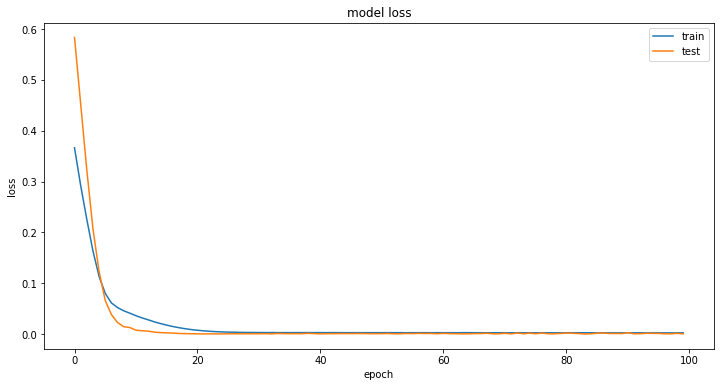

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.10 RMSE
Test Score: 0.81 RMSE


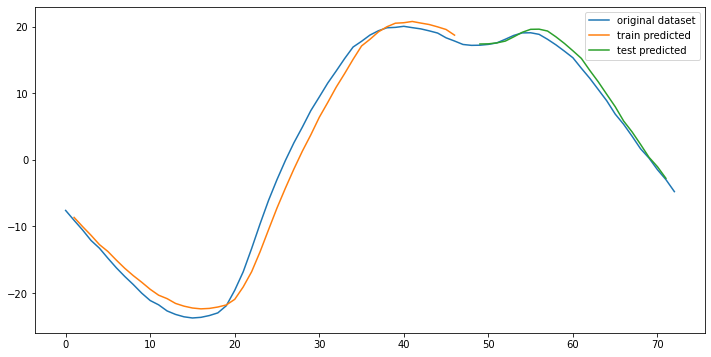

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize = (12,6))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['original dataset','train predicted','test predicted'])
plt.show()

In [ ]:
popt, _ = curve_fit(objective,time, hip_l)
print(popt)
a,b,c,d,e,f = popt

[ -152.87863573  1160.71692925 -3273.33433753  4193.91206979
 -2371.32371987   457.98203702]


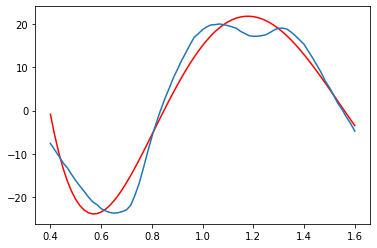

In [ ]:
y_line = objective(time,a,b,c,d,e,f)
plt.plot(time,y_line,c='r',)
plt.plot(time,hip_l);
plt.show()


##Right hip trajectory

In [ ]:
data = hip_r.reshape((-1,1))

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

48 25


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
print(trainX.shape,trainY.shape)
# print(trainX)

(46, 1) (46,)


In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(50, activation = 'relu',input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY,validation_data=(testX,testY), epochs=100, batch_size=1, verbose=2)

Epoch 1/100
46/46 - 1s - loss: 0.5164 - val_loss: 0.1403
Epoch 2/100
46/46 - 0s - loss: 0.3638 - val_loss: 0.0915
Epoch 3/100
46/46 - 0s - loss: 0.2151 - val_loss: 0.0577
Epoch 4/100
46/46 - 0s - loss: 0.0984 - val_loss: 0.0505
Epoch 5/100
46/46 - 0s - loss: 0.0393 - val_loss: 0.0608
Epoch 6/100
46/46 - 0s - loss: 0.0244 - val_loss: 0.0644
Epoch 7/100
46/46 - 0s - loss: 0.0222 - val_loss: 0.0642
Epoch 8/100
46/46 - 0s - loss: 0.0211 - val_loss: 0.0611
Epoch 9/100
46/46 - 0s - loss: 0.0198 - val_loss: 0.0579
Epoch 10/100
46/46 - 0s - loss: 0.0186 - val_loss: 0.0532
Epoch 11/100
46/46 - 0s - loss: 0.0177 - val_loss: 0.0501
Epoch 12/100
46/46 - 0s - loss: 0.0163 - val_loss: 0.0465
Epoch 13/100
46/46 - 0s - loss: 0.0154 - val_loss: 0.0425
Epoch 14/100
46/46 - 0s - loss: 0.0142 - val_loss: 0.0406
Epoch 15/100
46/46 - 0s - loss: 0.0132 - val_loss: 0.0368
Epoch 16/100
46/46 - 0s - loss: 0.0119 - val_loss: 0.0339
Epoch 17/100
46/46 - 0s - loss: 0.0112 - val_loss: 0.0315
Epoch 18/100
46/46 - 0s

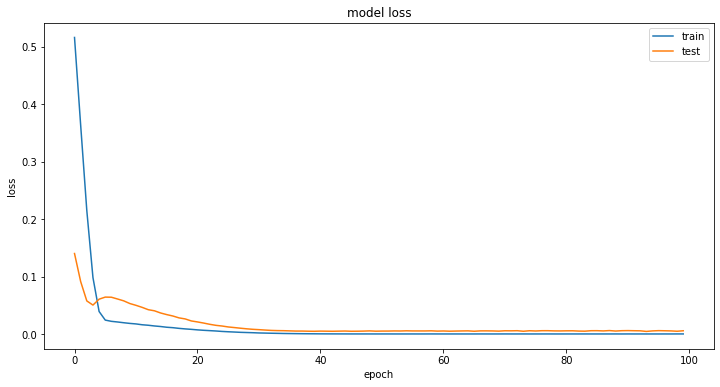

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.66 RMSE
Test Score: 3.31 RMSE


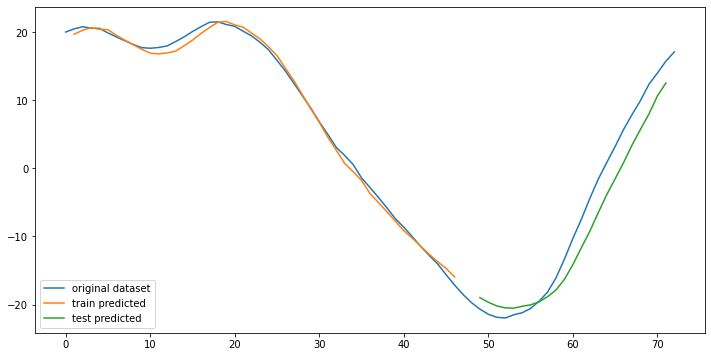

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize = (12,6))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['original dataset','train predicted','test predicted'])
plt.show()

In [ ]:
popt, _ = curve_fit(objective,time, hip_r)
print(popt)
a,b,c,d,e,f = popt

[ -871.91650561  4459.58030684 -8494.68065194  7476.1882929
 -3062.42881912   490.39741976]


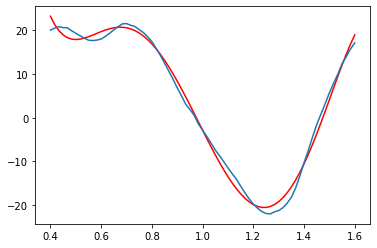

In [ ]:
y_line = objective(time,a,b,c,d,e,f)
plt.plot(time,y_line,c='r',)
plt.plot(time,hip_r);
plt.show()
